In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz

In [2]:
#load the dataset
df = pd.read_csv("C:/Users/stanl/Downloads/dirty_decision_tree_dataset.csv")
df.head()

,Age,Income,Marital_Status,Credit_Score,Defaulted
0,25.0,50000,Single,720,0.0
1,34.0,NaN,Married,680,1.0
2,28.0,62K,Single,NaN,0.0
3,45.0,72000,NaN,800,0.0
4,NaN,55000,Divorced,650,NaN


In [3]:
#check out missing values
missing_values_loc = df.isnull().sum()
missing_values_loc

Age               2
Income            3
Marital_Status    2
Credit_Score      3
Defaulted         2
dtype: int64

In [4]:
# another way of checking the missing values
missing_total = df.isna().any()
missing_total

Age               True
Income            True
Marital_Status    True
Credit_Score      True
Defaulted         True
dtype: bool

In [5]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             8 non-null      float64
 1   Income          7 non-null      object 
 2   Marital_Status  8 non-null      object 
 3   Credit_Score    7 non-null      object 
 4   Defaulted       8 non-null      float64
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


In [6]:
# dropping all the empty columns
df = df.dropna()

In [7]:
# Fixing Incorrect Data Types
df["Income"] = pd.to_numeric(df["Income"], errors='coerce')  # Convert to numeric
df["Credit_Score"] = pd.to_numeric(df["Credit_Score"], errors='coerce')
df = df.dropna()  # Drop rows again after fixing types

In [8]:
# Encode Categorical Variables (Marital_Status)
df["Marital_Status"] = df["Marital_Status"].astype("category").cat.codes

In [9]:
#setting up our features and Target
X = df.drop("Defaulted", axis=1)
y = df["Defaulted"]

In [10]:
# Train-Test Split time or at least that's what i did, but the dataset is very small and i keep getting error with the 
# regular train test split
X_train, y_train = X, y

In [11]:
# Initialize and Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [12]:
# Predictions
y_pred = model.predict(X)

In [13]:
# evaluating the model
print("Accuracy Score:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



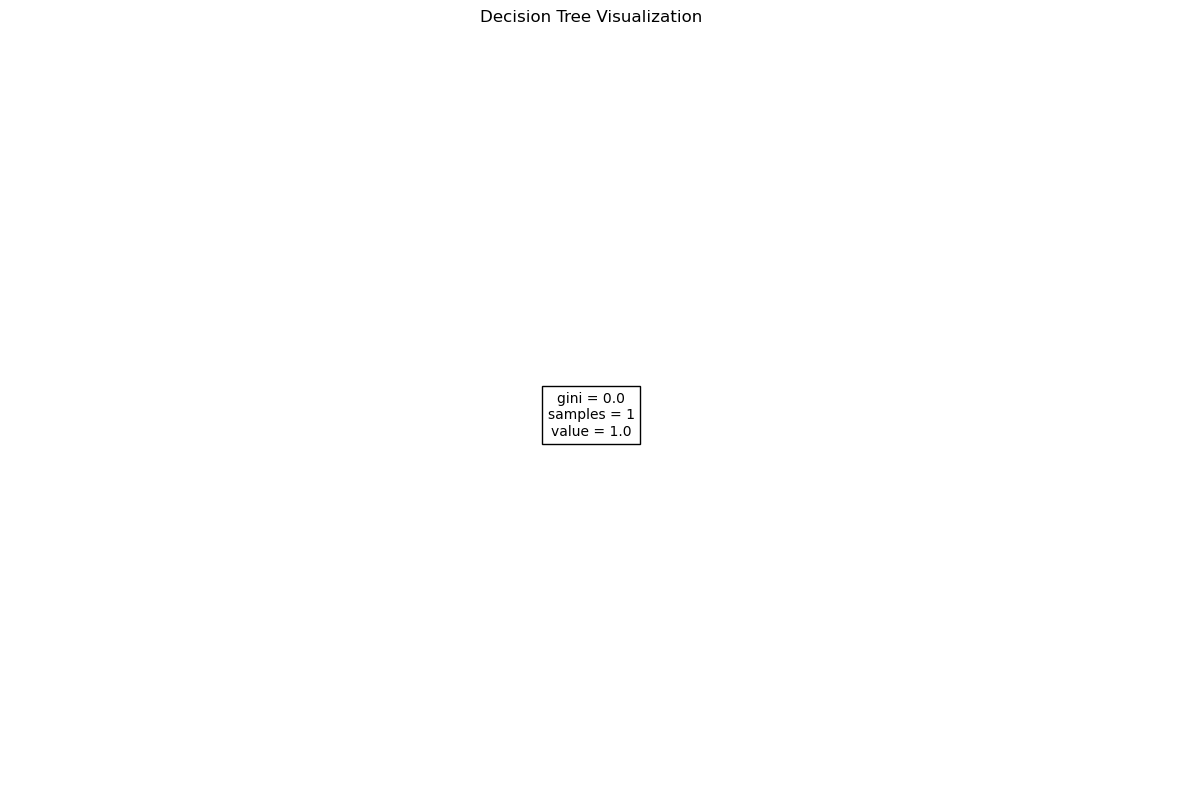

In [14]:
# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=["No Default", "Default"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

C:\Users\stanl\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\stanl\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


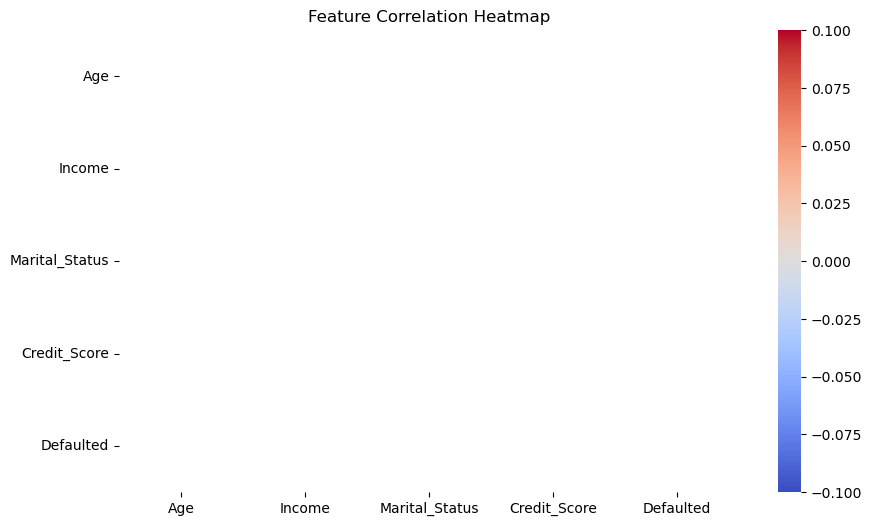

In [15]:
# Heatmap for Feature Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

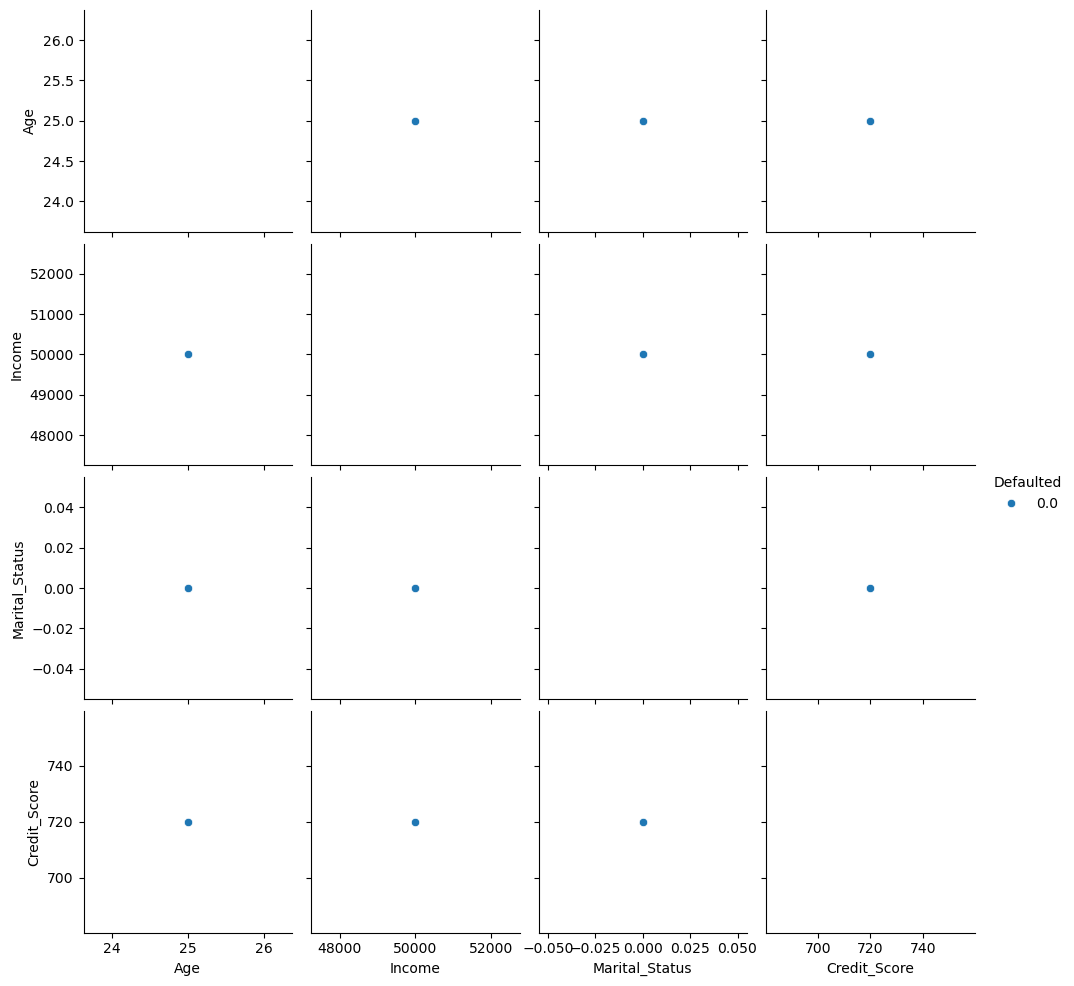

In [16]:
# Pairplot of Features using Seaborn
sns.pairplot(df, hue="Defaulted")

In [17]:
df.head()

,Age,Income,Marital_Status,Credit_Score,Defaulted
0,25.0,50000,0,720,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      float64
 1   Income          1 non-null      int64  
 2   Marital_Status  1 non-null      int8   
 3   Credit_Score    1 non-null      int64  
 4   Defaulted       1 non-null      float64
dtypes: float64(2), int64(2), int8(1)
memory usage: 41.0 bytes


In [19]:
# adding a new column that compares the predicted default vs the actual defaulted
df['Predicted_Defaulted'] = model.predict(X)

In [20]:
comparison = df[['Defaulted', 'Predicted_Defaulted']]
print(comparison.head())

   Defaulted  Predicted_Defaulted
0        0.0                  0.0


In [42]:
df.to_csv("updated_dataset_with_predictions.csv", index=False)